In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.time import Time
#import astropysics.phot as phot
import math
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib
import sys, time
import numpy as np
import scipy.signal as signal

import scipy
from scipy.stats import linregress
from IPython.display import clear_output

from scipy import stats


def jobs_manager():
    from IPython.lib.backgroundjobs import BackgroundJobManager
    from IPython.core.magic import register_line_magic
    from IPython import get_ipython

    jobs = BackgroundJobManager()

    @register_line_magic
    def job(line):
        ip = get_ipython()
        jobs.new(line, ip.user_global_ns)

    return jobs

jobs = jobs_manager()

In [2]:
pixels = np.loadtxt("FullMappingTable_V3.txt", delimiter="\t")

camera_dimensions = np.array([1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 35, 32, 29, 26, 23, 20, 17, 14, 11, 8, 5, 2])

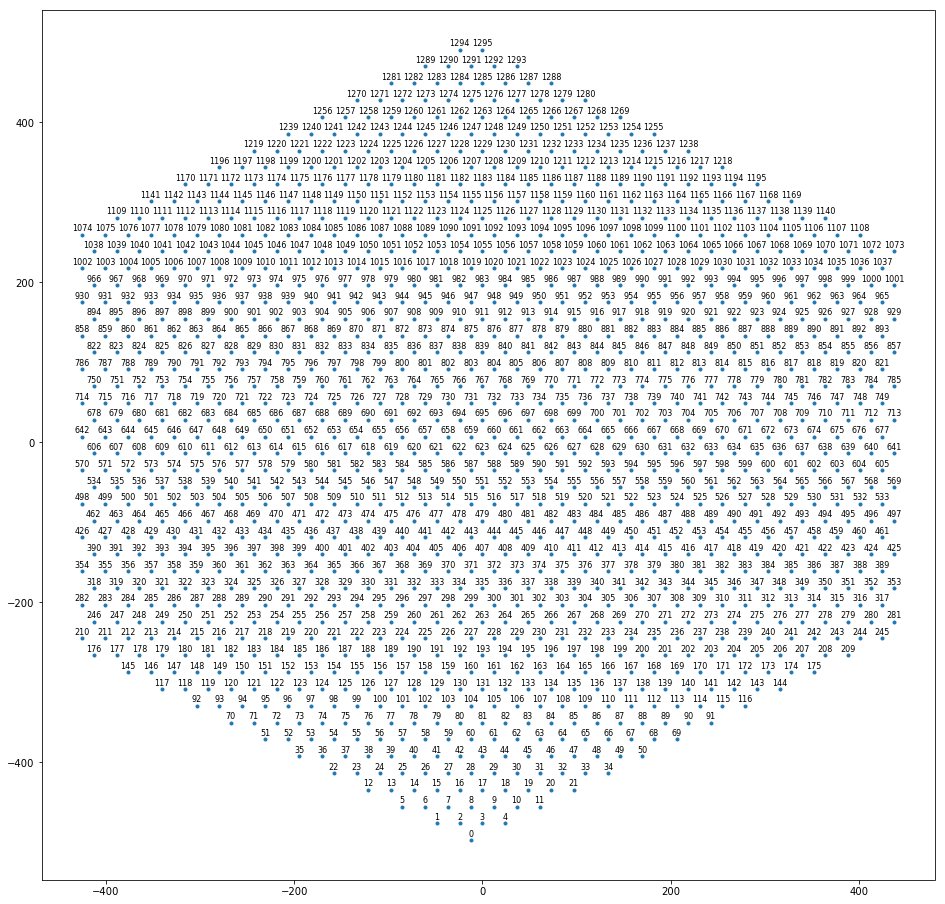

In [90]:
pixels_ids = np.array(pixels[:,6], dtype=np.int)
pixels_x = pixels[:,9]
pixels_y = pixels[:,10]

fig, ax = plt.subplots(1, sharex=True, figsize=(16, 16))

for i in range(pixels_ids.shape[0]):
    a = ax.annotate(int(pixels_ids[i]), (pixels_x[i], pixels_y[i]+5),  fontsize=8, ha="center")
ax.plot(pixels_x, pixels_y, '.')
plt.show()

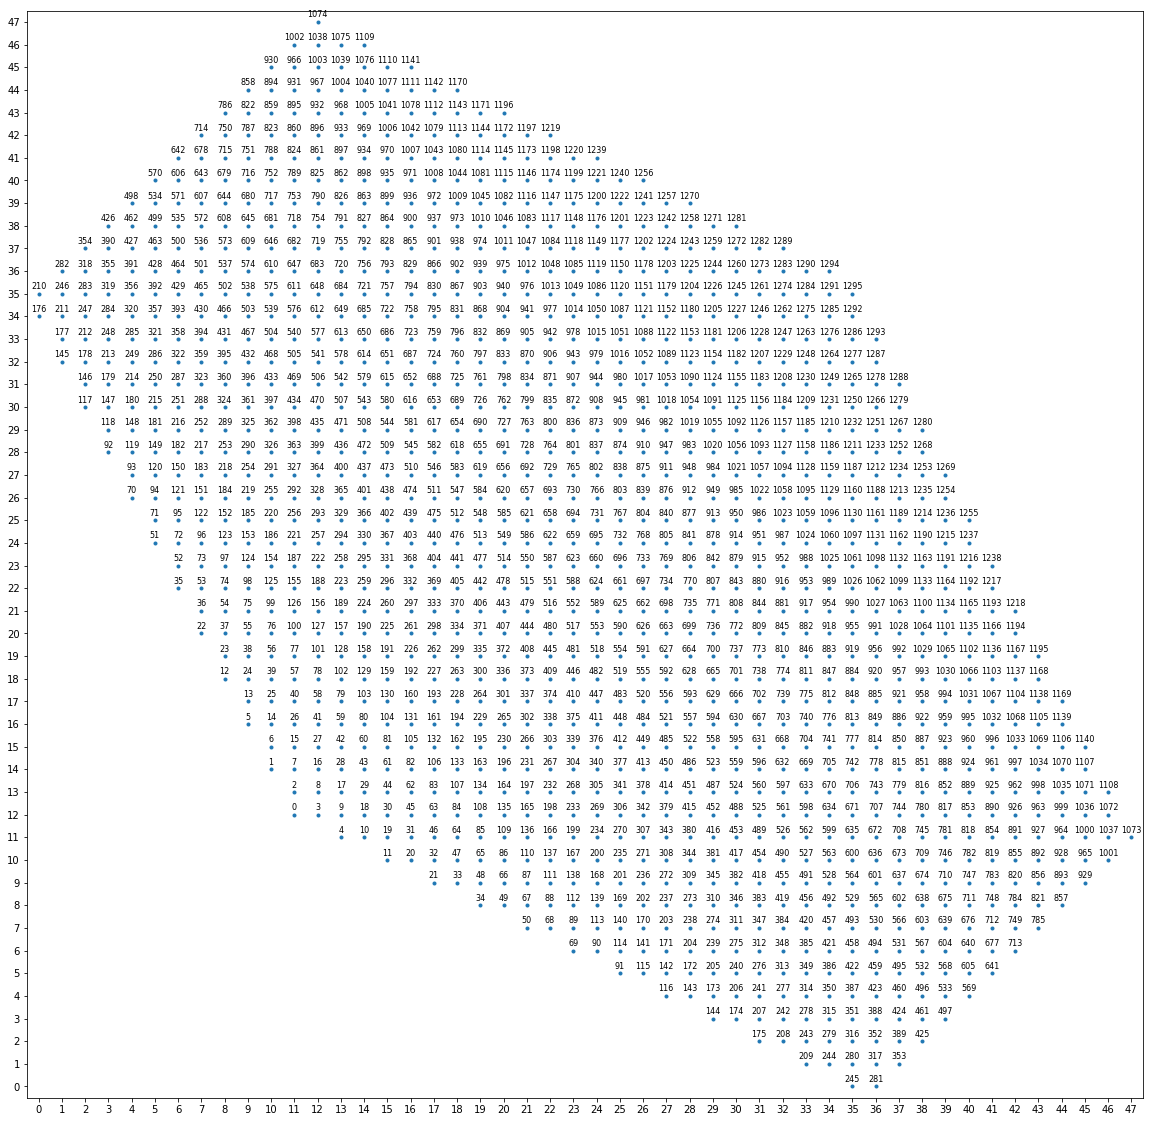

In [117]:
new_x = []
new_y = []

for row in range(0, 12):
    c = camera_dimensions[row]
    for p in range(c):
        y = 2 * row - p
        x = - row + p
        new_x.append(x)
        new_y.append(y)

index = 0
for row in range(12, 36):
    c = camera_dimensions[row]
    if row % 2 == 0:
        index+=1
    for p in range(c):
        y = 22 + index - p
        x = - 23 + row + p - index + 1
        new_x.append(x)
        new_y.append(y)

for row in range(36, 48):
    c = camera_dimensions[row]
    for p in range(c):
        y = 71 - row - p
        x = 2 * (row - 36) + p + 1
        
        new_x.append(x)
        new_y.append(y)
    

new_x = np.array(new_x)
new_y = np.array(new_y)

new_x = new_x - np.min(new_x)
new_y = new_y - np.min(new_y)

fig, ax = plt.subplots(1, sharex=True, figsize=(20, 20))
for i in range(len(new_x)):
    a = ax.annotate(i, (new_x[i], new_y[i]+0.2),  fontsize=8, ha="center")
a = ax.plot(new_x, new_y, '.')
a = plt.xticks(np.arange(min(new_x), max(new_x)+1, 1.0))
a = plt.yticks(np.arange(min(new_y), max(new_y)+1, 1.0))
a = ax.set_ylim([min(new_y) - 0.5, max(new_y) + 0.5])
a = plt.xlim([min(new_x) - 0.5, max(new_x) + 0.5])
a = plt.show()

In [119]:
shear_pixels = pixels.copy()
shear_x = []
shear_y = []
for i in pixels_ids:
    shear_x.append([new_x[i]])
    shear_y.append([new_y[i]])
shear_x = np.array(shear_x)
shear_y = np.array(shear_y)   

shear_pixels = np.append(shear_pixels, shear_x, axis=1)
shear_pixels = np.append(shear_pixels, shear_y, axis=1)

np.savetxt('FullMappingTable_V3_withshear.txt', shear_pixels, header="Can_master\tCan_node\tModule\tMCR\tFADC_Board\tPixel_number\tPixelID\tFADC_Quad\tFADC_Chan\tx[mm]\ty[mm]\timage_x\timage_y", fmt='\t'.join(['%i', '%i', '%i', '%i', '%i', '%i', '%i', '%i', '%i', '%.2f', '%.2f', '%i', '%i']))